<a href="https://colab.research.google.com/github/Dhanush-adk/machine_learning/blob/main/LR_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Use the URL for the raw CSV data
url2 = 'https://raw.githubusercontent.com/Dhanush-adk/machine_learning/main/D3.csv'
df = pd.read_csv(url2)

# Display the first 5 rows of the DataFrame
df.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [3]:
df.corr()

,X1,X2,X3,Y
X1,1.000000,-0.007525,0.116157,-0.861120
X2,-0.007525,1.000000,-0.037818,0.235563
X3,0.116157,-0.037818,1.000000,-0.218163
Y,-0.861120,0.235563,-0.218163,1.000000


In [4]:
X1 = df['X1'].to_numpy()
X2 = df['X2'].to_numpy()
X3 = df['X3'].to_numpy()

Y = df['Y'].to_numpy()

In [6]:
const = np.ones((len(Y),1))
X_train = np.append(const, X1.reshape(-1,1), axis=1)
#reshape Y to a column vector
Y_train = np.array(Y).reshape(-1,1)


In [10]:
X_train[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [52]:
theta = np.random.rand(2)
theta

array([0.10330416, 0.93212565])

In [53]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * len(y)) * np.sum(sqrErrors)
    return J

In [54]:
cost = compute_cost(X_train, Y_train, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 440.85288070631987


In [57]:
def gradient_descent(X, Y, theta, alpha, epochs):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(Y)  # Number of training examples
    cost_history = []

    for i in range(epochs):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / len(Y)) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history.append(compute_cost(X, Y, theta))

    return theta, cost_history

In [59]:
theta, cost_history = gradient_descent(X_train, Y, theta, 0.01, 100)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 1.0720843  -0.14716245]
cost_history = [6.815278778183332, 6.656310169329684, 6.51389186786214, 6.3860647822497985, 6.271102916738079, 6.167485631932858, 6.073873206519817, 5.989085307266606, 5.9120820212069045, 5.841947145093256, 5.777873463491881, 5.7191497788606105, 5.665149485114763, 5.615320500997798, 5.569176401432827, 5.526288604289017, 5.486279486962915, 5.448816322121891, 5.4136059351250845, 5.3803899972384555, 5.3489408789810895, 5.319057996944243, 5.290564595357221, 5.263304910663006, 5.237141673523406, 5.21195390809789, 5.187634993218953, 5.16409095429698, 5.141238958496549, 5.119005988993862, 5.097327677003668, 5.0761472728003065, 5.055414739191838, 5.035085952874708, 5.015122000830595, 4.995488560454927, 4.976155353452566, 4.95709566472198, 4.938285918493935, 4.919705304911124, 4.901335451045995, 4.8831601310684105, 4.865165010904106, 4.847337423279347, 4.829666169535701, 4.812141345029117, 4.794754185306669, 4.777496930588331, 4.760362706375355, 

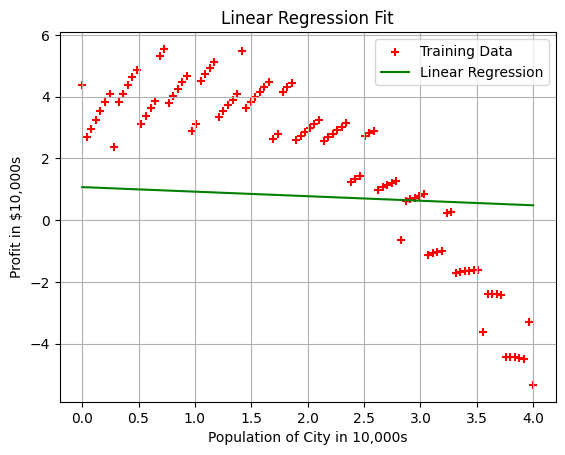

In [62]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X_train[:, 1], Y_train, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
plt.plot(X_train[:, 1], X_train.dot(theta), color='green', label='Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


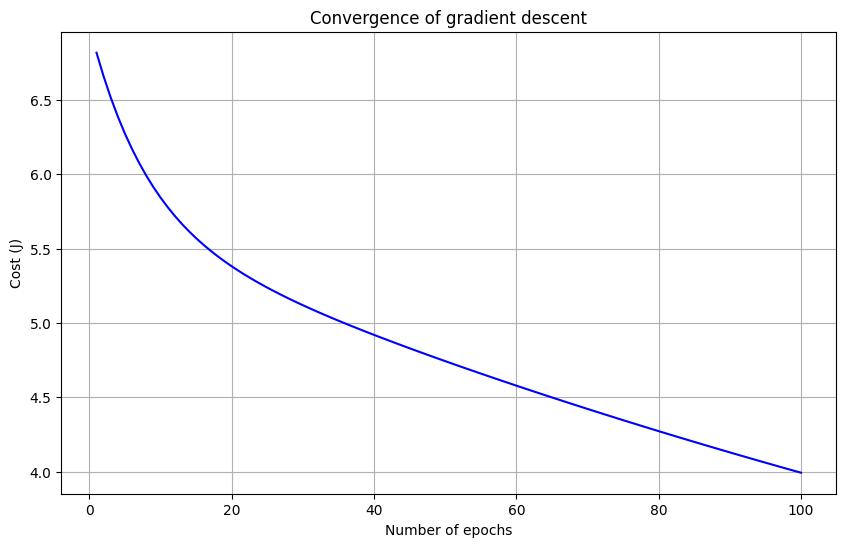

In [64]:

plt.plot(range(1, 100 + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of epochs')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()